### Implementing Batch GD

In [192]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [193]:
# Generating dataset
X,y= make_regression(n_samples=1000, n_features=20,n_informative=20,noise=10)
X.shape, y.shape

# Normalisation
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X-u)/std

In [194]:
# Preprocessing
m = X.shape[0]
ones = np.ones((m,1))

X = np.hstack((ones, X))
X.shape

(1000, 21)

In [195]:
# Defining functions for Batch Gradient Descent
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):

    e = 0.0
    m = X.shape[0]

    y_ = hypothesis(X, theta)
    e = np.sum((y - y_)**2)

    return e/m

def gradient(X, y, theta):

    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, y_ - y)
    m = X.shape[0]
    return grad/m

def batch_gradient_descent(X, y, learning_rate = 0.01, max_steps = 300):

    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []

    for _ in range(max_steps):
        # Batch Gradient -> Complete data set at once

        e = error(X, y, theta)
        error_list.append(e)

        grad = gradient(X, y, theta)
        theta -= learning_rate*grad

    return theta, error_list


In [196]:
theta, error_list = batch_gradient_descent(X, y)

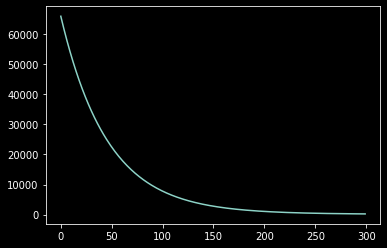

In [197]:
plt.plot(error_list)

As can be seen, the error drops from 70k to saturation in 250+ steps

### Implementing Mini Batch GD

In [198]:
# Defining functions for Mini Batch Gradient Descent

def mini_batch_gradient_descent(X, y, learning_rate = 0.01, max_steps = 100, batch_size = 50):

    error_list=[]
    all_error_list = []
    theta=np.zeros((X.shape[1],))

    data=np.hstack((X,y.reshape(-1,1)))

    for _ in range(max_steps):
        np.random.shuffle(data)
        m=data.shape[0]

        total_batches=m//batch_size

        for i in range(total_batches):

            batch_data=data[i*batch_size:(i+1)*batch_size]

            X_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]

            batch_gradient=gradient(X_batch,y_batch,theta)

            theta = theta - learning_rate*batch_gradient

            err = error(X_batch,y_batch,theta)
            all_error_list.append(err)

        e = error(X_batch, y_batch, theta)
        error_list.append(e)
            
    return theta, error_list, all_error_list

In [199]:
theta, error_list, all_error_list = mini_batch_gradient_descent(X, y)

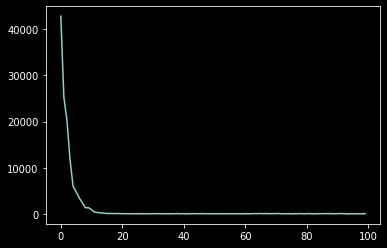

In [200]:
plt.plot(error_list)
plt.show()

In [201]:
error_list

[42789.19253491112,
 25285.997420178282,
 20265.659077942943,
 11822.968215658615,
 6028.923701806368,
 4814.892534935198,
 3539.147703175482,
 2449.6715541369385,
 1366.3920115556998,
 1404.036506859575,
 972.9953444217313,
 434.24525088097414,
 363.96530039371333,
 257.9469339376936,
 227.45413497016705,
 137.3134511787886,
 157.06268353749002,
 126.1788547082824,
 143.1250422695877,
 129.99572819866466,
 108.62951326613882,
 102.56706339504734,
 89.61331166021132,
 92.73328801241257,
 87.36722976281072,
 80.27891725886595,
 109.16200751539677,
 75.95819189430627,
 88.63872091790329,
 84.70534260273917,
 104.56117350583976,
 114.79066267504069,
 91.12173502785745,
 80.49094119326918,
 93.96726087357612,
 88.62614424721527,
 99.32350522746205,
 99.78685990178805,
 122.0229759745214,
 64.64937055885207,
 108.01584575855826,
 54.932597090493026,
 105.10470661270527,
 116.3528088026045,
 99.24191950320345,
 98.63339952719276,
 113.52980822258475,
 99.84243229403265,
 78.32521548957156,
 

We see, we get the saturation in $\leq$ 20 steps!!

For a better noisy graph, with more data points having all iterations of theta

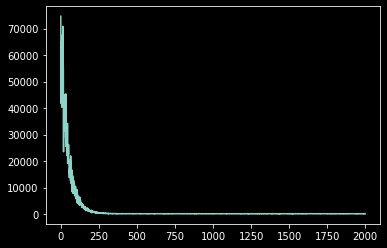

In [202]:
plt.plot(all_error_list)
plt.show()

We can see that updates are noisy, but we get faster convergence